 # Developers relationship with artificial intelligence tools
In this project we will look at developers opinion about using AI tools in their work and if it is worth it or not

#### Q1 What percentage of developers use AI tools?

#### Q2 Do developers trust artificial intelligence tools?

#### Q3 Does the rate of use and trust differ among the more experienced? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import datetime

In [2]:
def plot_percentage(df: pd.DataFrame, column_name: str) -> None:
    """
    Plot the percentage of each value in the specified column of a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column for which percentage is to be plotted.
    
    Returns:
    - None
    """
    # Get the value counts for the specified column
    status_vals = df[column_name].value_counts()
    
    # Calculate percentages
    status_percentages = (status_vals / status_vals.sum()) * 100
    print(status_percentages)

    # Plotting
    status_percentages.plot(kind="bar")
    plt.ylabel("Percentage")
    plt.xlabel("Values")
    plt.title("Percentage of Each Value in '{}' column".format(column_name))
    plt.show()

In [3]:
def plot_percentage_comparison(df1: pd.DataFrame, df2: pd.DataFrame, column_name: str, Title: str) -> None:
    """
    Plot the percentage comparison of a specified column between two DataFrames.

    Parameters:
    - df1 (pd.DataFrame): The first DataFrame containing the data.
    - df2 (pd.DataFrame): The second DataFrame containing the data for comparison.
    - column_name (str): The name of the column for which percentage comparison is to be plotted.
    - Title (str): The title of the plot.
    
    Returns:
    - None
    """
    # Get the value counts for the specified column for both dataframes
    status_vals1 = df1[column_name].value_counts()
    status_vals2 = df2[column_name].value_counts()
    
    # Calculate percentages for both dataframes
    status_percentages1 = (status_vals1 / status_vals1.sum()) * 100
    status_percentages2 = (status_vals2 / status_vals2.sum()) * 100

    # Get unique categories
    categories = sorted(set(status_percentages1.index) | set(status_percentages2.index))
    index = np.arange(len(categories))

    # Plotting
    plt.figure(figsize=(10, 6))  # Set the figure size
    width = 0.35  # Width of bars

    plt.bar(index - width/2, status_percentages1.reindex(categories, fill_value=0), width, label='First DataFrame')
    plt.bar(index + width/2, status_percentages2.reindex(categories, fill_value=0), width, label='Second DataFrame')

    plt.ylabel("Percentage")
    plt.title(Title)
    plt.xticks(index, categories)
    plt.legend()
    plt.show()


# Data Understanding

In [4]:
public = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [5]:
public.shape

(89184, 84)

In [6]:
public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

# Data Preparation

creating subset data for senior (public_pro), A person is called a senior if he/she has 5 years of experience or more

In [7]:
public['YearsCodePro'].unique() # how many years have you coded professionally (as a part of your work)?


array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

In [8]:
# Replace 'Less than 1 year' with '0'
public.loc[public['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = '0'

# Replace 'More than 50 years' with '51'
public.loc[public['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = '51'

# Fill NaN values with 0 (or any other default value)
public['YearsCodePro'].fillna(0, inplace=True)

# Convert the column to the integer type
public['YearsCodePro'] = public['YearsCodePro'].astype(int)

In [9]:
public_pro=public[public['YearsCodePro']>=5]

# Evaluate

### Q1 What percentage of developers use AI tools?

In [10]:
public['AISelect'].unique() #Do you currently use AI tools in your development process?

array([nan, 'Yes', "No, and I don't plan to", 'No, but I plan to soon'],
      dtype=object)

Yes                        44.379526
No, and I don't plan to    29.805736
No, but I plan to soon     25.814739
Name: AISelect, dtype: float64


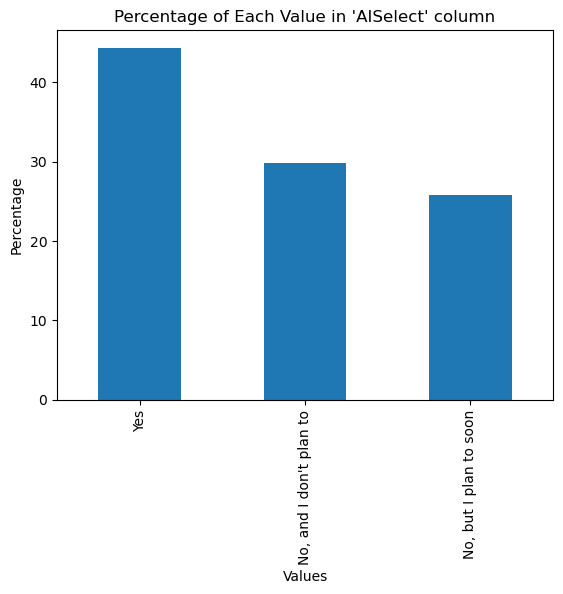

In [11]:
plot_percentage(public, 'AISelect')

from all developer around 45% use it and 25% plan to use it soon >> It's a good sign that it Worth it

These tools may be common for those with little experience, what about seniors?


### Q2 Do developers trust artificial intelligence tools?

In [12]:
public['AIBen'].unique() #How much do you trust the accuracy of the output from AI tools as part of your development workflow?

array([nan, 'Somewhat distrust', 'Somewhat trust',
       'Neither trust nor distrust', 'Highly distrust', 'Highly trust'],
      dtype=object)

Somewhat trust                39.298977
Neither trust nor distrust    30.681152
Somewhat distrust             21.711512
Highly distrust                5.456382
Highly trust                   2.851977
Name: AIBen, dtype: float64


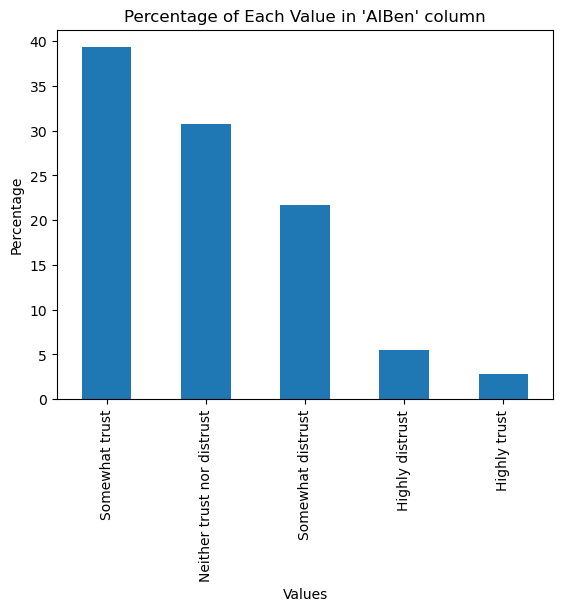

In [13]:
plot_percentage(public, 'AIBen')

Most developers seem to have confidence, but with some skepticism

### Q3 Does the rate of use and trust differ among the more experienced? 

##### Q3.1 comparison between all developers and seniors in percentage of use AI tools

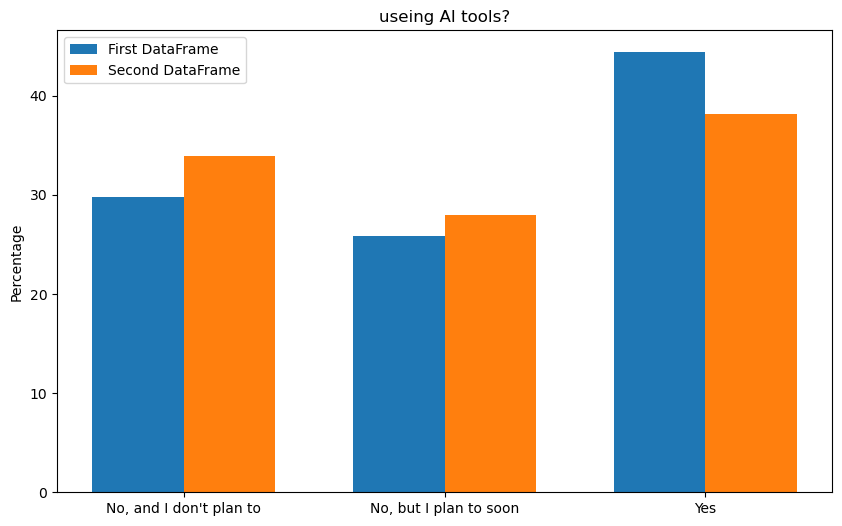

In [14]:
plot_percentage_comparison(public, public_pro, 'AISelect','useing AI tools?')

It seems to be more common among less experience people, but the percentage is still good among seniors

##### Q3.2 comparison between all developers and seniors in trust of AI tools

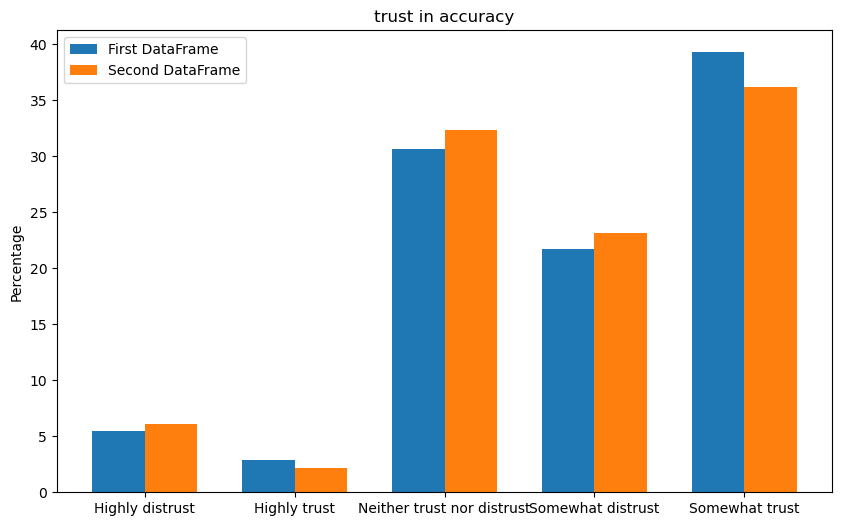

In [15]:
plot_percentage_comparison(public, public_pro, 'AIBen',"trust in accuracy")

Most people seem to have confidence, but with some doubts and suspicions rising among seniors

# Results

The 45 percent rate of use among developers of modern technology is astonishing, with a moderate skepticism rate that gives an indication that the industry will witness a major change.